# Homework 

Any mass can lead to a gravitational potential in 3-D (x-y-z) space
\begin{equation}
\nabla^2\Phi=4\pi G\rho
\end{equation}
    

We will set G=1 for this problem.  
Please solve the potential of a line mass 
(i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) using Gauss-Siedel method. Since the problem has symmetry in the Z direction:
\begin{equation}
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
\end{equation}


The domain is X from 0 to 100, Y from 0 to 100. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$
at the boundary and $\rho_{50,50}$ is always 1)

Please verify that the potential has radial dependence close to 2*G*$\mu$*ln(r)+constant. 
Where $\mu$ is its mass per unit length and r is the distance to the line mass. 

Initializing
0
0.875
0.15625
0.0546875
0.0234375
0.011444091796875
0.00710296630859375
0.004836559295654297
0.003505110740661621
0.002656723838299513
0.0020830048015341163
10
0.001676967651292216
0.0013790829016215866
0.0011540799136753321
0.0009799799191441139
0.000842507245912838
0.000732062205130446
0.0006419963555089128
0.0005675869080868923
0.0005054041384094637
0.0004529086381371162
20
0.00040818768435972423
0.00036977839372990574
0.0003365464798106739
0.0003076014935274986
0.00028223651803529603
0.0002598845741711882
0.00024008664621905876
0.00022246791804602511
0.0002067198955119703
0.00019258680584896375
30
0.000179855143314471
0.00016834555593996537
0.0001579064928184581
0.0001484091884657885
0.00013974367203170666
0.0001318155688303799
0.00012454351937589599
0.0001178570833344772
0.00011169502699476946
0.00010600391610288834
40
0.00010073695338031104
9.585301327974093e-05


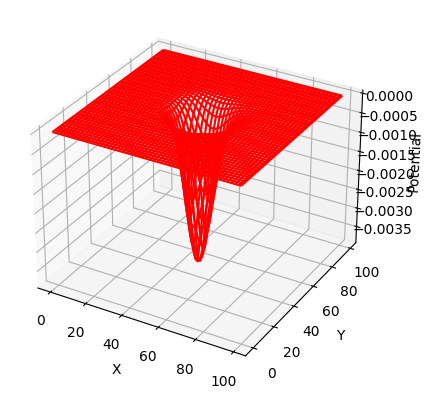

In [20]:
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
Nmax = 100; Niter = 1000; V = zeros((Nmax, Nmax), float)   

for k in range(0, Nmax):  V[50,50] = -1.             
    
for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 1./4.*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j] #
            if(maxerr<abs(du)): 
                maxerr=abs(du)
            V[i,j]= V[i,j] + du
    print(maxerr)
    if(maxerr<1.e-4):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = fig.add_subplot(projection='3d')                 # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig